we have students and study time.
Study time can go from 0 to the max student values.
Then we habve exam results 0 - 100 in percentage

x study time
y exam score

Expectation:

no study = bad scores

little study = slighlty bad scores

a lot of study = great grades

a lot of study = bad grades

no study = good grades

linear regression generates a line of best fit.

go through each point if study time is accurate, this is the most likely corresponding y value.

We go down and see the errors.

The errors are the difference between the prediction and the actual result.

the structure of linear regression is y = m*x+b

in this example: exam scores are equal to the steepness of the plotted study time multiplied by the values of the study time (how much time studied) plus the distance between the plotted study time (the difference between your study duration and the next persons study duration).

We expect the line to fit the points it may be slightly influenced by outliers but it has high accuracy.

We need to minimise the error in total.

We need to define the error function so we can minimise it.

In order to minimise something it needs to be something that produces a value. We want to minimise the value.

If we look at y=m*x+b

I get the best possible Y with the least error

The error function that needs to be defined will be:

E = 1/n * sum from i = 0 up until n

and now we get y(i) which iw the actual yi value

Which we subtract yi_hat for example.

We can actually remove that and replace it with:

y(i) - m*x +b

We can square that and that would be the mean squared error.

The mean squared error function. It's not complicated.

It is a math way of writing for each point from 0 to the last point. get y value subtract gunction y value. i.e the actual y value and the functional y value.

In the end we take all these distances and divide them by n (the amount of points) and use them to map it.

This will give us the mean **squared error.**

This is the error we are trying to minimise in linear regression.

**Below is how does the optimization work:**

The X is just the input and y is just the output.

We want to find m and b.
So we can minimise m and b.

How can we do that by taking the partial derivative with respect to m and with respect to b because the gives us the direction of the steepest asccend with respect to m.

We need to find how to change m to maximally increase e.

We need to find how to change b to maximally increase b.

We do want to decrease e but if we just want to subtract the opposide direction it will cancel it out.

We are going to take the partial derivative and then we are just going to go to the opposite direction of this gradient.

The derivative of e with respect to m is i = 0 all the way to n.

minus m * x(i) + b also multiply with the inside derivative. It is this as sum. The factor we end up with is -x(i)

## The Direction of the steepest descent in regards to m and b

We can simplify this   -2 / n * sum starting from i=0 to the nth degree, x(i) * y(i) (-m * x(i) + b)

2E / 2b equals  - 2/n * sum of i all the way to n and then just (y(i)-(m*xi +b))

## now the opposite direction

Take the new m and assign it the current m - the learning rate * the direction of the steepest ascent.
m = m - L * 2E / 2m
b = b - L* 2E / 2b


Deal with many different variables.

This is done to the nth amount of features.

This is the direction of the linear ascent so we subtract. The learning rate is the size of the steps we take.

The lower the learning the better the resule, As we can pay attention to details more0.0001.

***Heteroskedasticity*** means that the variance of the errors is not constant across observations. • In particular the variance of the errors may be a function of explanatory variables.

**Multicolinerity**

Multicollinearity is a statistical concept where several independent variables in a model are correlated. Two variables are considered perfectly collinear if their correlation coefficient is +/- 1.0. Multicollinearity among independent variables will result in less reliable statistical inferences.

How do you deal with **Multicolinerity**

#3 Choices

#Pick one feature (Pick the features)
Find the data that is most closely correlated with the target.

#Combine
Add and engineer a columb called rooms.

Residuals: normally distributed database.

Find fuzzy matching library and look in to Kitchen features

Count the amount of kitchen features for one hot encoding

**Homoscedasticity**

Homoscedasticity, or homogeneity of variances, is an assumption of equal or similar variances in different groups being compared. This is an important assumption of parametric statistical tests because they are sensitive to any dissimilarities. Uneven variances in samples result in biased and skewed test results.

import libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**import data**

In [2]:
data = pd.read_csv('/content/HoursStudiedAndTestScores.csv')

In [3]:
print(data)

     studyTime  testScores
0            1          17
1            2           3
2            2          22
3            2          30
4            1          12
..         ...         ...
109          6          82
110          7          75
111          6          61
112          5          72
113          5          77

[114 rows x 2 columns]


visualise them

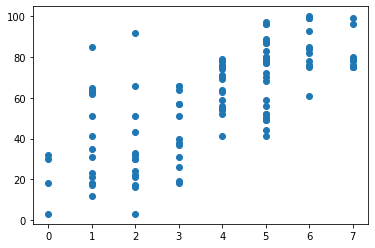

In [4]:
plt.scatter(data.studyTime , data.testScores)
plt.show()

Loss function

In [5]:
def loss_function(m, b, points):
  total_error = 0
  for i in range(len(points)):
    x = points.iloc[i].studyTime
    y = points.iloc[i].testScores
    total_error += (y - (m * x + b)) ** 2
  total_error / float(len(points))

In [6]:
def gradient_descent(m_now, b_now, points, learning_rate):
  m_gradient = 0
  b_gradient = 0

  n = len(points)

  for i in range(n):
    x = points.iloc[i].studyTime
    y = points.iloc[i].testScores

    m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
    b_gradient += -(2/n) * (y - (m_now * x + b_now))

  m = m_now - m_gradient * learning_rate
  b = b_now - b_gradient * learning_rate
  return m, b

In [19]:
m = 0
b = 0
learning_rate = 0.02
epochs = 226 # iterations or test

In [20]:
for i in range(epochs):
  if i % 50 == 0:
    print(f"Epoch: {i}")
    m, b = gradient_descent(m, b, data, learning_rate)
    plt.show()
print(m, b)

Epoch: 0
Epoch: 50
Epoch: 100
Epoch: 150
Epoch: 200
13.418417833544714 3.647398571306794


In [21]:
print(m, b)

13.418417833544714 3.647398571306794


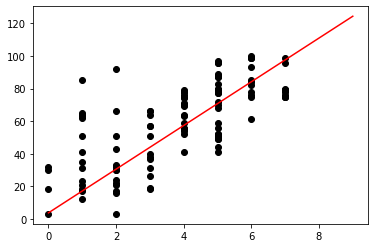

In [22]:
plt.scatter(data.studyTime, data.testScores, color="black")
plt.plot(list(range(0, 10)), [m * x + b for x in range(0, 10)], color="red")